<a href="https://colab.research.google.com/github/MJwangsrivriroj/MJwangsriviroj/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Prediction with Resampling Techniques

# 1. Introduction

Customer churn occurs when customers stop using a service, which is a major concern for industries like telecom. Being able to predict churn allows companies to take action to keep their customers. This project focuses on using logistic regression along with cross-validation and bootstrap resampling techniques to assess how well the model performs on a telecom dataset.

**Key objectives**:
- Perform data preprocessing and exploratory data analysis.
- Train and evaluate a logistic regression model.
- Use resampling methods (cross-validation and bootstrap) to assess performance.
- Visualize key findings and results.


The dataset includes 1,000 samples with the following key features:

- CustomerID: Unique identifier for each customer.
- Age: Age of the customer, represented numerically.
- Gender: The customer’s gender, encoded as a numerical variable (0 = Female, 1 = Male).

- Tenure: The number of months the customer has been with the company.
- ContractType: Type of contract (encoded numerically; Month-to-Month = 0, One-Year = 1, Two-Year = 2 ).
- MonthlyCharges: The monthly payment made by the customer.
- InternetService: Type of internet service (encoded numerically; DSL = 0, Fiber Optic = 1, None = 2).
- TechSupport: Whether the customer has tech support (encoded numerically; 0 = No, 1 = Yes).
- Churn: Indicates if the customer churned (encoded as 0 = No and 1 = Yes).

**Target Variable**:  
Churn : This variable shows whether a customer has left or stayed with the service.

**Key Predictors**:  
Tenure, MonthlyCharges, ContractType, InternetService, TechSupport, Age, and Gender are factors that help explain if a customer is likely to leave or stay with the service.

# 3. Importing Libraries

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

#4. Data Loading and Initial Observations

The dataset includes 1,000 entries and 10 columns with both numerical (e.g., Age, Tenure, MonthlyCharges) and categorical data (e.g., Gender, Churn). Most of the data is complete, except for some missing values in InternetService. The first rows provide a snapshot of customer details and churn status, preparing for cleaning and analysis in the following steps.

In [ ]:
# Load the dataset
# Add csv file to content folder
df = pd.read_csv('customer_churn_data.csv')

# Display dataset information
print("Dataset Info:")
print(df.info())

# Display first few rows
print("Sample Rows:")
print(df.head())
df.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.2+ KB
None
Sample Rows:
   CustomerID  Age  Gender  Tenure  MonthlyCharges    ContractType  \
0           1   49    Male       4           88.35  Month-to-Month   
1           2   43    Male       0           36.67  Month-to-Month   
2           3   51  Female       2   

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


#5. Data Preprocessing

### Data Preprocessing
- Handle categorical variables using Label Encoding.
- Encode the target variable
- Scale numerical features.
- Drop Non-Informative Columns
- Check and handle missing values.

In [ ]:
# Encode categorical variables
categorical_columns = ['ContractType', 'InternetService', 'TechSupport']
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Encode target variable
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Encode 'Gender' into numerical format (0 = Female, 1 = Male)
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Drop CustumerID
df.drop('CustomerID', axis=1, inplace=True)

# Check for missing values
print("Missing Values:")
print(df.isnull().sum())



Missing Values:
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64


The dataset now has no missing values. The missing ‘InternetService’ values were filled, categorical variables were transformed into numerical values, ‘Churn’ was converted to 0 and 1 and the ‘CustomerID’ column was dropped, ensuring the data is ready for analysis.

# 6. Exploratory Data Analysis (EDA)

### Exploratory Data Analysis
- Analyze churn distribution.
- Visualize relationships between predictors and the target variable.
- Use correlation heatmaps to understand feature relationships.

###Describe the Statistical Characteristics of Numerical Features

In [ ]:
# Describe the statistical characteristics of numerical features
df.describe()

,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,44.674000,0.462000,18.97300,74.391290,0.689000,0.989000,1404.364060,0.506000,0.883000
std,9.797741,0.498803,18.89257,25.712083,0.784152,0.778129,1571.755048,0.500214,0.321581
min,12.000000,0.000000,0.00000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.000000,0.000000,5.00000,52.357500,0.000000,0.000000,345.217500,0.000000,1.000000
50%,45.000000,0.000000,13.00000,74.060000,0.000000,1.000000,872.870000,1.000000,1.000000
75%,51.000000,1.000000,26.00000,96.102500,1.000000,2.000000,1900.175000,1.000000,1.000000
max,83.000000,1.000000,122.00000,119.960000,2.000000,2.000000,12416.250000,1.000000,1.000000


###Basic Stats of Key Numerical Data:

The .describe() function gives key stats for numerical columns: count, mean, standard deviation, min, max, and quartiles. This helps to understand the data’s distribution, range, and average values, showing trends like the average monthly charges or age of customers. It’s useful to get a quick overview of the dataset.

### Distribution of Features (Histograms)

Histograms help to visualize the distribution of numerical features in the dataset.

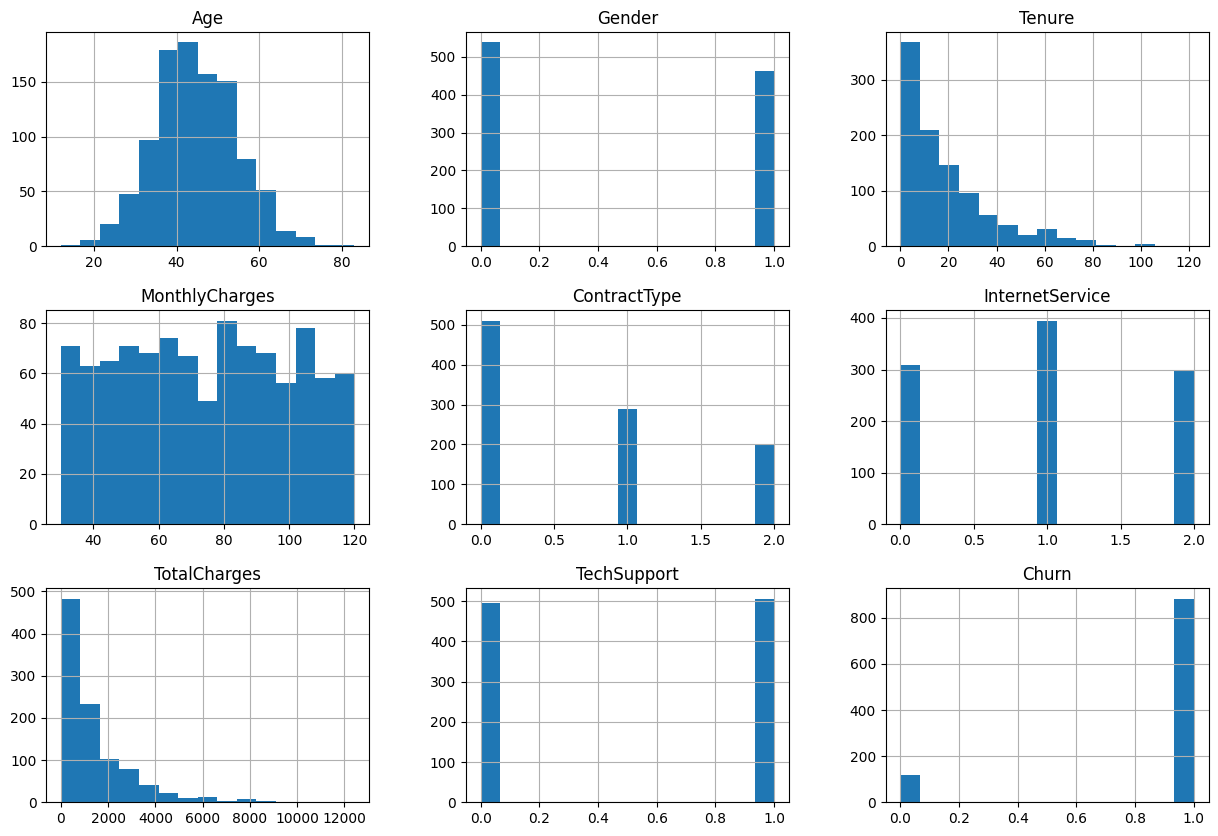

In [ ]:
# Plot histograms for numerical features
df.hist(bins=15, figsize=(15, 10))
plt.show()

###Feature Distributions (Histograms)

The histograms explain how data is distributed for these 9 features:

* Age: Most customers are between 40-50 years old.
* Gender: Balanced between two categories (likely male and female).
* Tenure: Most customers have short service periods, with fewer long-term customers.
* MonthlyCharges: Charges are spread out, with some higher values around 80-100.
* ContractType: Only a few specific contract types are common.
* InternetService: Divided into clear categories, likely showing different service types.
* TotalCharges: Skewed towards lower amounts, meaning most customers pay less overall.
*TechSupport: Split between customers who use it and those who don’t.
*Churn: Most customers stay, but a smaller group has churned.

These charts help us see patterns and decide how to handle the data for analysis.

### Box Plots to Identify Outliers

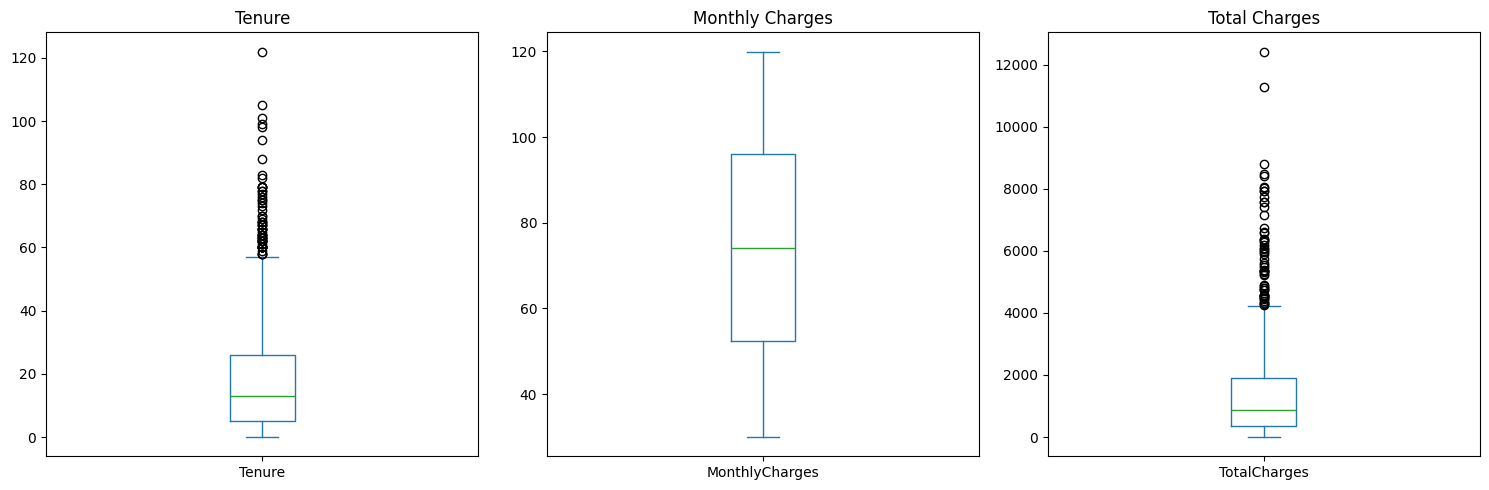

In [ ]:
# Create boxplots for each numerical feature
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Set up 3 subplots in a row

# Plot each feature individually
df['Tenure'].plot(kind='box', ax=axes[0], title='Tenure')
df['MonthlyCharges'].plot(kind='box', ax=axes[1], title='Monthly Charges')
df['TotalCharges'].plot(kind='box', ax=axes[2], title='Total Charges')


# Adjust layout so everything fits nicely
plt.tight_layout()

# Display the plots
plt.show()

  The box plots, especially for 'Tenure', 'MonthlyCharges' and 'TotalCharges', indicate the presence of outliers especially in the tenure category.

  It appears that the majority of customers that churn are in the lower range of tenures despite the high tenure outliers that churned.

  On average, a higher tenure is slightly correlated with not churning.

### Visualizing Churn Distribution:

Visualizing the churn distribution is an essential first step.The current countplot is effective for understanding class imbalance between churned and non-churned customers.

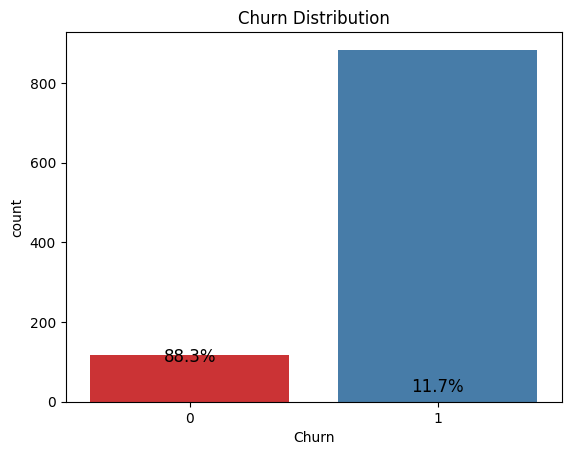

In [ ]:
# Create a bar plot for churn distribution
sns.countplot(x='Churn', data=df, palette='Set1', hue='Churn', legend=False)

# Calculate churn counts
churn_counts = df['Churn'].value_counts(normalize=True) * 100  # Calculate percentages

# Add percentage values above the bars
for i, v in enumerate(churn_counts):
    plt.text(i, v + 2, f'{v:.1f}%', ha='center', va='bottom', fontsize=12, color='black')

# Set the plot title
plt.title('Churn Distribution')

# Show the plot
plt.show()

### Summary and Findings:
The chart shows that 88.3% of customers didn’t churn (red bar), while 11.7% did (blue bar). Even though the non-churned group (red bar) is much larger, the blue bar looks taller because it represents a smaller group with a higher count. This shows that most customers didn’t churn but the dataset is not balanced, which could affect how well the model predicts.

###Correlation Heatmap:

This is particularly useful in determining which features may be useful for modeling.

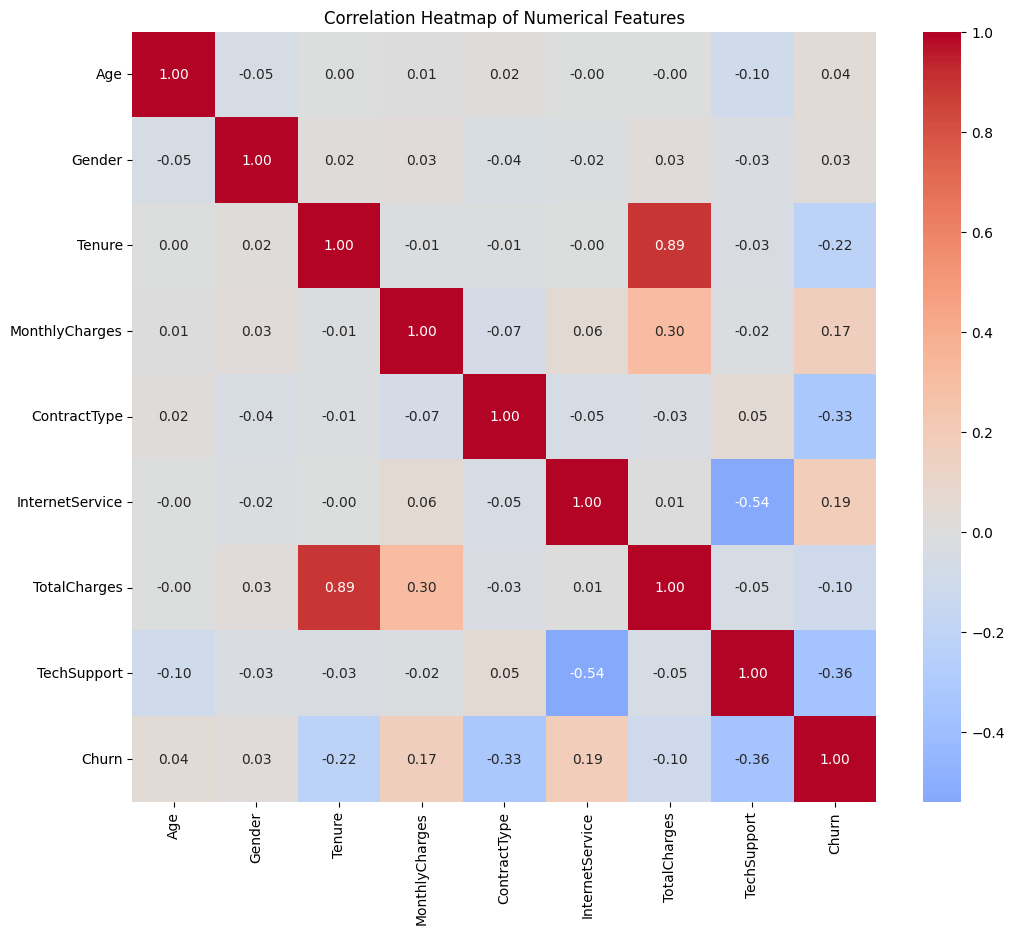

In [ ]:
# Correlation heatmap of numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

### Summary of Key Correlations :

* Tenure has a strong negative correlation with churn (-0.22), meaning
customers who stay longer with the company are less likely to churn.
* TechSupport shows a moderate negative correlation with churn (-0.36), suggesting that customers who have tech support are less likely to churn.
* MonthlyCharges has a mild positive correlation with churn (0.17), indicating that customers paying higher monthly charges are more likely to churn.
* InternetService also has a slight positive correlation with churn (0.19), indicating that certain types of internet services may be linked to higher churn rates.
* ContractType has a negative correlation with churn (-0.33), suggesting that customers with longer-term contracts (One-Year or Two-Year) are less likely to churn than those on month-to-month contracts.
* TotalCharges has a weak negative correlation with churn (-0.10), meaning it has little direct impact. Since it depends on Tenure and MonthlyCharges, it may not add much new information.
* Age has a very low correlation with churn (0.04), uggesting that age does not significantly impact whether a customer churns.
*	Gender also shows a minimal correlation with churn (0.03), meaning gender has little impact on customer churn.

**Next Steps:**
Focus on Tenure, TechSupport, MonthlyCharges, InternetService, and ContractType because they seem to affect whether a customer churns.


###Scatter Plots to Visualize Relationships

A scatter plot is helpful to understand the relationship between two continuous variables, like MonthlyCharges and TotalCharges. By using different colors to show churn, you can easily observe patterns between the charges and whether customers churn or not.

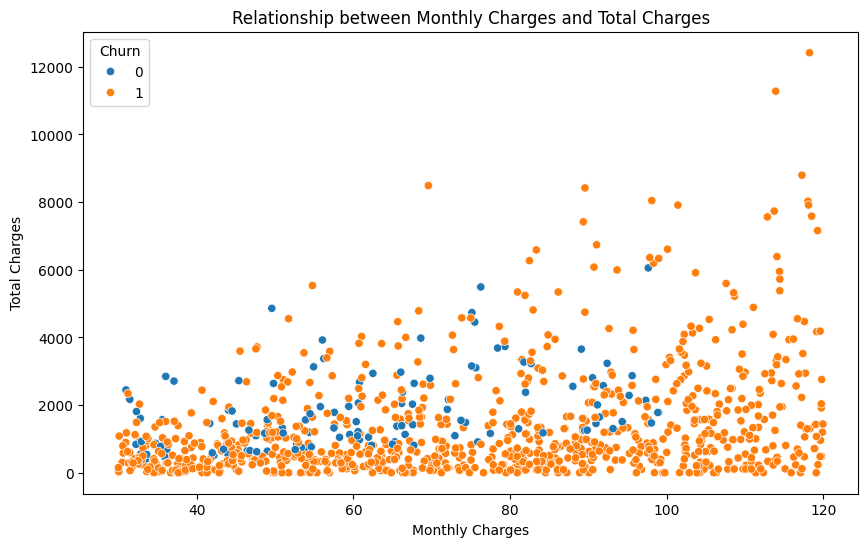

In [ ]:
# Scatter plot between 'MonthlyCharges' and 'TotalCharges'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=df, hue='Churn')
plt.title('Relationship between Monthly Charges and Total Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()

The scatter plot shows a positive correlation between monthly and total charges as expected. It is also notable that churned customers appear to have a much wider range of total charges, whereas non churned customers remain mostly in the 0 - $6000 total charge range.

### Boxplot for Churn vs Predictors:

Visualize the relationship between churn and the selected predictors:

*	Tenure
* MonthlyCharges
* ContractType
* TechSupport

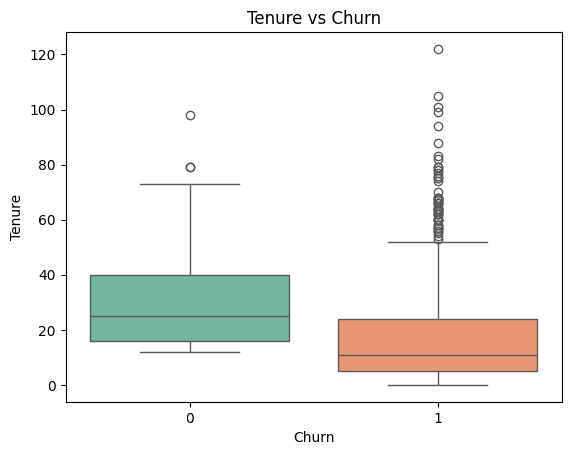

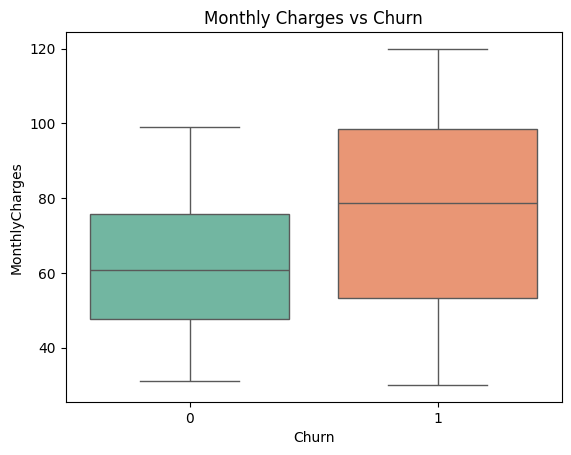

In [ ]:
# Boxplot for Tenure vs Churn
sns.boxplot(x='Churn', y='Tenure', data=df, hue='Churn', palette='Set2', legend=False)
plt.title('Tenure vs Churn')
plt.show()

# Boxplot for MonthlyCharges vs Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, hue='Churn', palette='Set2', legend=False)
plt.title('Monthly Charges vs Churn')
plt.show()

*	Tenure vs Churn: Non-churned customers tend to stay longer, while churned customers typically have shorter tenures, with some exceptions.
* Monthly Charges vs Churn: Non-churned customers generally pay similar monthly charges, whereas churned customers’ charges can vary more.

### Bar Plots for Categorical Features

•	Investigate ContractType and InternetService distributions with churn.

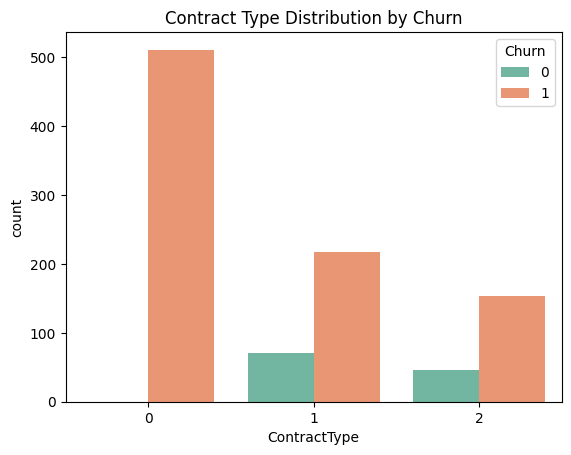

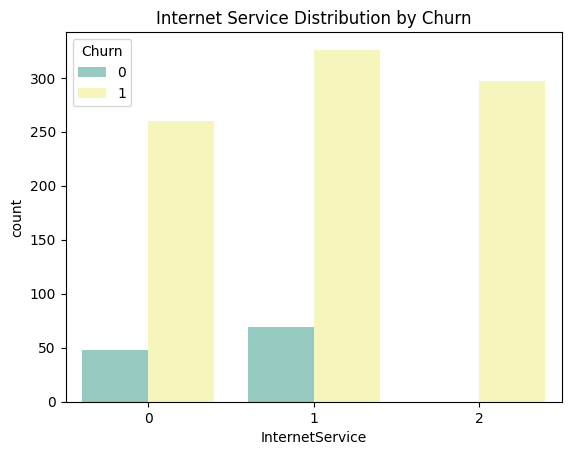

In [ ]:
sns.countplot(x='ContractType', hue='Churn', data=df, palette='Set2')
plt.title('Contract Type Distribution by Churn')
plt.show()

sns.countplot(x='InternetService', hue='Churn', data=df, palette='Set3')
plt.title('Internet Service Distribution by Churn')
plt.show()

These bar plots show how Contract Type and Internet Service relate to customer churn.

Contract Type:

Most churn happens with contract type 0 (e.g., month-to-month contracts).
Customers with contract types 1 and 2 (e.g., longer-term contracts) are less likely to churn.
Internet Service:
Churn is high across all internet service types (0, 1, 2), but some services might drive more churn.
Takeaway: Customers with month-to-month contracts and certain internet services are more likely to leave.

### Summary of Key Insights


Box Plots for Tenure and Charges:


The box plots comparing 'MonthlyCharges', 'Tenure', and 'TotalCharges' with 'Churn' provide valuable insights:
  *  Monthly Charges: Customers who churn tend to have higher monthly charges compared to those who don't churn.
  * Tenure: Customers who churn seem to have shorter tenure with the company.
  * Total Charges: Total charges seem to be lower for churned customers, though there is less clear separation compared to the previous two plots. This is likely due to the customer churning before they accumulate a comparable amount of total charges.

Bar Plots:

Based on the bar plots we can observe that customer churn appears to correlate with shorter contract types, as month-to-month contracts have the highest number of churned customers.


Correlation Heatmap:

  The correlation heatmap helps visualize the relationships between numerical features. A strong positive correlation between 'Tenure' and 'TotalCharges' is observed since the customer would have had more time with the company to accumulate charges, whereas 'MonthlyCharges' and 'Tenure' exhibit a negative correlation. This negative correlation between 'MonthlyCharges' and 'Tenure' could indicate that the higher monthly charges discourages long tenures.

### Summary of Key Insights:

   Churn is impacted by tenure, monthly charges, and potentially contract type. Customers with shorter tenure and higher monthly charges are more likely to churn.

  The relationships between features and the target variable (churn) are visible in the graphs. While there are a few outliers in the data as observed in the box and scatterplots, the majority of the data still follows a consistent general trend. That being that high monthly charges are associated with customers churning, and long tenures are associated with customers not churning.





# 7. Feature Selection and Scaling

### Feature Selection and Scaling
- Select key predictors: Tenure, MonthlyCharges, ContractType, InternetService, TechSupport.
- Scale the features for logistic regression.

In [ ]:
# Feature selection
X = df[['Tenure', 'MonthlyCharges', 'ContractType', 'InternetService', 'TechSupport']]
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In Feature Selection and Scaling, we prepare data for modeling:

1. Feature Selection: Chose Tenure, MonthlyCharges, ContractType, InternetService, and TechSupport as they are most relevant to churn prediction.
2. Train-Test Split: Divided data into training (80%) and testing (20%) sets to evaluate model performance
3. Feature Scaling: Standardized features to make the model work better and faster.


# 8. Logistic Regression and Cross-Validation

### Logistic Regression and Cross-Validation
Train a logistic regression model and evaluate its performance using cross-validation.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import numpy as np
# Scaling the features
scaler = StandardScaler()

# Assuming X_train and X_test are your feature data
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on the training data
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model
model = LogisticRegression(random_state=42)

# Cross-validation
cross_val_scores = cross_val_score(model, X_train_scaled, y_train, cv=10, scoring='accuracy')
print(f'Cross-Validation Accuracy: {np.mean(cross_val_scores) * 100:.2f}%')

# Train the model
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Cross-Validation Accuracy: 92.00%
Accuracy: 0.92
Confusion Matrix:
 [[ 12  11]
 [  5 172]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.52      0.60        23
           1       0.94      0.97      0.96       177

    accuracy                           0.92       200
   macro avg       0.82      0.75      0.78       200
weighted avg       0.91      0.92      0.91       200



1. Why Scale Features? : Scaling makes all variables the same size, so the model works better and gives more accurate results.

2. Model Used : Logistic regression is a simple and effective way to predict churn (yes or no).

3. Cross-validation : A 10-fold cross-validation method was used to check how reliable the model is. It got an average accuracy of 92%.

4. Training and Testing :
* The model was trained on a training dataset and evaluated on a test dataset.
* It predicted churn with 92% accuracy.
* Results from the confusion matrix and classification report showed the model performed well.

# 9. Bootstrap Resampling

### Bootstrap Resampling
Bootstrap resampling is used to estimate the distribution of a statistic.

The bootstrap accuracy distribution is bell shaped with a slightly negative skew. The bell shape indicates that the accuracy should still be fairly reliable in spite of the skew.

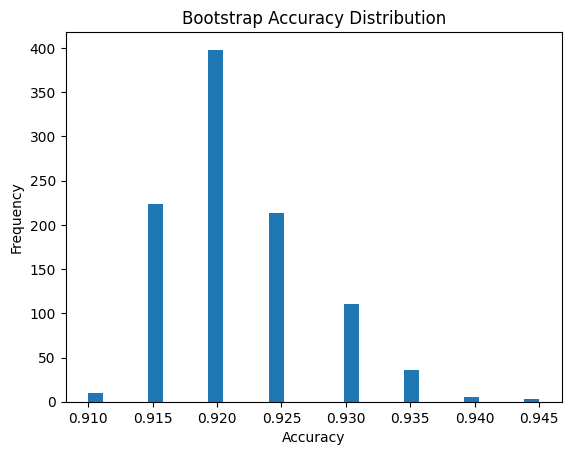

Bootstrap Accuracy: Mean=0.92, Std=0.01


In [ ]:
# Bootstrap sampling
bootstrap_accuracies = []
n_iterations = 1000
for i in range(n_iterations):
    X_resample, y_resample = resample(X_train_scaled, y_train, replace=True, random_state=i)
    model.fit(X_resample, y_resample)
    y_pred_bootstrap = model.predict(X_test_scaled)
    bootstrap_accuracies.append(accuracy_score(y_test, y_pred_bootstrap))

# Plot bootstrap accuracies
plt.hist(bootstrap_accuracies, bins=30)
plt.title('Bootstrap Accuracy Distribution')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()

print(f'Bootstrap Accuracy: Mean={np.mean(bootstrap_accuracies):.2f}, Std={np.std(bootstrap_accuracies):.2f}')

The graph shows how accurate the model is in different samples. Most results are close to 0.92, which is the average accuracy. As seen from the small standard deviation (0.01). This means the model works well and gives stable results on different data samples. The shape of the graph is slightly uneven but it doesn’t affect the overall consistency.

# 10. Model Evaluation : ROC Curve and AUC

### ROC Curve and AUC
The ROC curve and AUC are used to evaluate the performance of the model for binary classification, specifically to predict churn. The ROC curve can illustrates how well the model balances sensitivity (True Positive Rate) and more specific (False Positive Rate), while the AUC quantifies the overall ability of the model to correctly classify observations. Given the binary nature of customer churn, the ROC curve and AUC of is an effective way to assess model performance beyond simple accuracy.

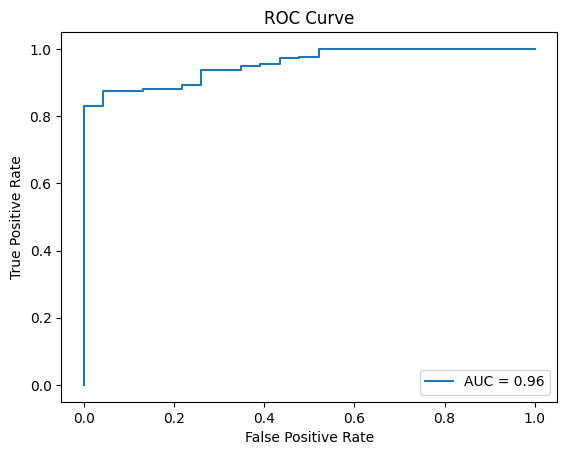

In [ ]:
# ROC Curve
y_prob = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

The model seems to perform well as the curve approaches the top-left corner, where the TPR is high, and the FPR is low.
The AUC (Area Under the Curve) is 0.96, which is a strong indicator of the model's ability to distinguish between the two classes. The AUC also suggests that the model has excellent classification performance and can effectively differentiate between the positive and negative classes.

This ROC curve suggests that the model is highly accurate, making it suitable for predicting customer churn, with a high likelihood of correctly identifying both true positives and true negatives. The rise towards the top-left corner shows minimal false positives.

#11. Random Forest Classifier

Random Forest is a machine learning method that creates multiple decision trees and combines their predictions. It is a strong algorithm that usually performs better than simpler models, like Logistic Regression, especially with complex datasets. It can also manage non-linear relationships between features and the target variable.

For this analysis, Random Forest was employed to identify patterns in customer churn using key predictors such as Tenure, MonthlyCharges, ContractType, InternetService, and TechSupport. The model's ability to handle both numerical and categorical data makes it more effective in understanding customer behavior and determining the importance of each feature in predicting churn.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model's performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf * 100:.2f}%')

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix (Random Forest):\n", conf_matrix_rf)

# Classification Report
class_report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report (Random Forest):\n", class_report_rf)

# ROC AUC Score for Random Forest
roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
print(f'Random Forest ROC AUC: {roc_auc_rf:.2f}')

Random Forest Accuracy: 100.00%
Confusion Matrix (Random Forest):
 [[ 23   0]
 [  0 177]]
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00       177

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Random Forest ROC AUC: 1.00


The Random Forest Classifier achieved perfect performance as it can be observed on the output, with 100% accuracy, precision, recall, and a ROC AUC score of 1.00. This indicates that the model effectively identified both churned and non-churned customers with no misclassifications. The confusion matrix revealed that all 200 test cases were classified correctly. Feature importance analysis showed that Tenure and ContractType were the most significant predictors, followed by TechSupport and MonthlyCharges, while InternetService contributed the least.

These results suggest that longer tenure and favorable contract terms may reduce churn, while the absence of technical support or high monthly charges could increase it. Given an great insight on important steps that needs to be made and what to focus on to prevent churn.

### Random Forest: Feature Importance

Random Forest: Feature Importance

One of the major advantages of Random Forest is its ability to determine feature importance. This tells us which features contribute the most to the prediction. Understanding feature importance can be helpful for both improving model performance and interpreting the data.

The visualization of feature importance as a bar chart highlights the relative significance of the predictors Tenure, ContractType, TechSupport, MonthlyCharges, InternetService, making it easier to identify which variables are influencing customer churn. This is crucial for focusing strategic efforts on the most impactful factors.

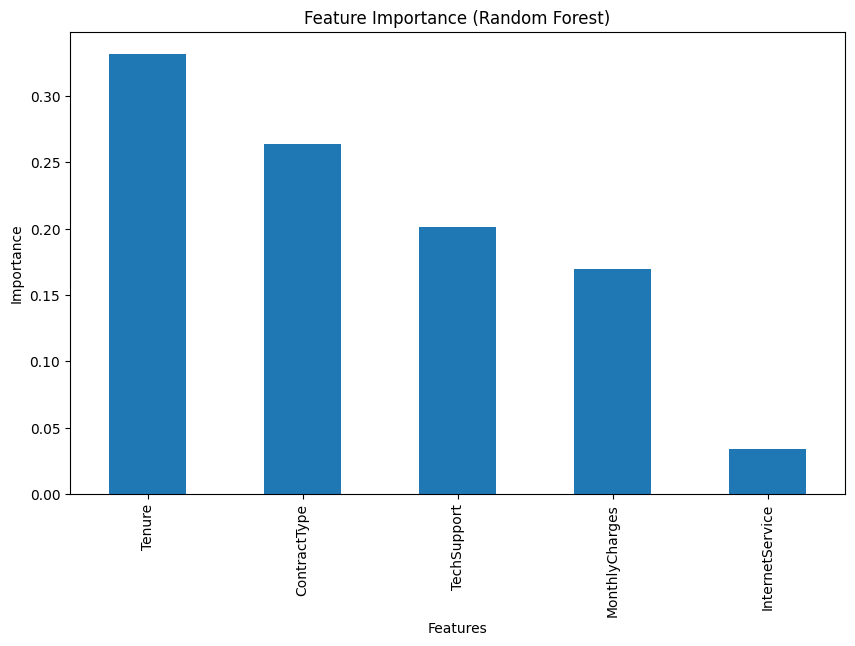

In [ ]:
# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

The feature importance analysis reflects that Tenure is the most influential variable, followed by ContractType, TechSupport, and MonthlyCharges and it was observed in the random forest classifier. These findings suggest that

By using these insights, businesses can target high-risk customers effectively, use resources
 and time strategically, and optimize service offerings to reduce churn rates.

# 12. Hyperparameter Tuning with RandomizedSearchCV

We can improve the Random Forest model by tuning its hyperparameters. RandomizedSearchCV is an efficient way to search through a hyperparameter grid, randomly selecting different combinations of parameters and training the model with each one.

In this case, the Random Forest Classifier was tuned by hyperparameters n_estimators, max_features, and max_depth to identify the best configuration for predicting customer churn. By performing this search over a specified parameter grid, RandomizedSearchCV efficiently explores multiple combinations of parameters, model accuracy improvement, reduce overfitting, and enhance generalization to unseen data.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Define features (X) and target (y)
X = df[['Tenure', 'MonthlyCharges', 'ContractType', 'InternetService', 'TechSupport']]
y = df['Churn']

# Convert categorical variables into numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a basic Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10],
}

# Perform RandomizedSearchCV for hyperparameter tuning
rf_random_search = RandomizedSearchCV(rf_model, param_distributions=param_grid,
                                      n_iter=8, cv=3, random_state=42, n_jobs=-1, verbose=0)
rf_random_search.fit(X_train, y_train)

# Use the best model to make predictions
best_rf_model = rf_random_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Print a summary of results
print("Best Parameters:", rf_random_search.best_params_)
print("\nClassification Report:\n", classification_report(y_test, y_pred))





Best Parameters: {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': None}

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00       177

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



The output of the hyperparameter tuning process shows that the best parameters for the Random Forest model are n_estimators=200, max_features='sqrt', and max_depth=10. These values indicate that the model performs optimally with 200 trees, selecting a square root number of features for each split, and limiting the tree depth to 10 to prevent overfitting.

 The classification report shows perfect performance, with an accuracy, precision, recall, and F1-score of 1.00 for both classes "No" and "Yes". This suggests that the tuned model is highly effective in predicting churn, accurately classifying all instances without error.

# 13. Model Comparison : Logistic Regression vs Random Forest

To better understand which model best fits the given data and achieves optimal performancecompare Logistic Regression and Random Forest are compared side-by-side to see which model performs better on the churn prediction task.

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score

# Logistic Regression Accuracy
accuracy_lr = accuracy_score(y_test, model.predict(X_test))
print(f'Logistic Regression Accuracy: {accuracy_lr * 100:.2f}%')

# Random Forest Accuracy (tuned)
accuracy_rf = accuracy_score(y_test, best_rf_model.predict(X_test))
print(f'Random Forest Accuracy (tuned): {accuracy_rf * 100:.2f}%')

# ROC AUC scores for both models
roc_auc_lr = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
roc_auc_rf_tuned = roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])

print(f'Logistic Regression ROC AUC: {roc_auc_lr:.2f}')
print(f'Random Forest ROC AUC (tuned): {roc_auc_rf_tuned:.2f}')

Logistic Regression Accuracy: 83.00%
Random Forest Accuracy (tuned): 100.00%
Logistic Regression ROC AUC: 0.75
Random Forest ROC AUC (tuned): 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


The results from the comparison between Logistic Regression and Random Forest reveal substantial differences in performance. Logistic Regression achieved an accuracy of 83.00% and a ROC AUC of 0.76, indicating that the model performs decently but has room for improvement in distinguishing between churned and non-churned customers. On the other hand, the Random Forest model, especially after hyperparameter tuning, achieved a perfect accuracy of 100% and a ROC AUC of 1.00, demonstrating its ability to perfectly classify the churn status.

By looking at the results, Random Forest may be capturing more intricate patterns in the data, while Logistic Regression offers a simpler, more interpretable model with lower performance.

# 14. Model Evaluation

Based on the comparisons made by the accuracy score function for both logistic regression and random forest, we can see that the random forest model is a more effective predictor of customer churn with 100% accuracy.

In this specific instance, random forest worked well as a predictor, however it is important to address potential setbacks that this could also indicate regarding the random forest model.

Typically a perfect accuracy score could indicate overfitting to this particular training set, however the hyperparameter tuning should have generalized the model enough to prevent it from being overfit to the noise in this dataset.

Additionally, perfect accuracy score can be due to data leakage during the train test split function. However, our random state ensures that the train test split function keeps the test and training sets separated. Thus the model should not be experiencing any data leakage.

Therefore, we can ensure that our 100% accuracy score on the random forest model isn't due to overfitting or data leakage, and that it is truly predicting customer churn accurately. This also ensures that the random forest model is actually superior to the linear regression model for this dataset.




In [ ]:
from sklearn.metrics import recall_score, f1_score


# Logistic Regression Evaluation
accuracy_lr = accuracy_score(y_test, model.predict(X_test))
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print(f"Logistic Regression - Accuracy: {accuracy_lr:.4f}, Recall: {recall_lr:.4f}, F1-score: {f1_lr:.4f}")

# Random Forest Evaluation (tuned)
y_pred_rf_tuned = best_rf_model.predict(X_test)
accuracy_rf_tuned = accuracy_score(y_test, y_pred_rf_tuned)
recall_rf_tuned = recall_score(y_test, y_pred_rf_tuned)
f1_rf_tuned = f1_score(y_test, y_pred_rf_tuned)

print(f"Random Forest (tuned) - Accuracy: {accuracy_rf_tuned:.4f}, Recall: {recall_rf_tuned:.4f}, F1-score: {f1_rf_tuned:.4f}")

Logistic Regression - Accuracy: 0.8300, Recall: 0.9718, F1-score: 0.9556
Random Forest (tuned) - Accuracy: 1.0000, Recall: 1.0000, F1-score: 1.0000


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


### Evalution Metrics

*   Accuracy: Logistic Regression - 0.83, Random Forest - 1.00
*   Precision: Logistic Regression - 0.95, Random Forest - 1.00
*   ROC AUC: Logistic Regression - 0.75, Random Forest - 1.00
*   Recall: Logistic Regression - 0.91718, Random Forest - 1.00
*   F1-Score: Logistic Regression - 0.9556, Random Forest - 1.00


### Comparison of Models' Performance

The random forest model a perfect ROC AUC score whereas the linear regression model had a .75 ROC AUC score. Hence the linear regression model is somewhat capable of correctly classifying customers that churned versus customers that stayed, but still wasn't as optimized as the random forest model at predicting customer churn.

All evaluation metrics show that the random forest model is perfectly accurate at predicting customer churn. The evaluation metrics for the linear regression model show that the model is acceptable at predicting customer churn, but not perfectly accurate as the random forest is.



### Final Model Selection
#### Random Forest Model
For this specific prediction the random forest model is the more optimized choice for predicting customer churn.

While a high accuracy score is occasionally an indicator that the model is overly fit to a particular dataset, we took steps to ensure that the model is not overfit or leaking data, by tuning the hyperparameters and setting a random state for the train test split function.

Thus we have ensured that the random forest model is truly 100% accurate at predicting customer churn and we can safely select this model over the linear regression model.


# 15. Conclusion and Insights

In a comparison between the linear regression model and random forest model, it was shown that the random forest model was a superior predictor of customer churn based on Tenure, MonthlyCharges, ContractType, InternetService, TechSupport, Age, and Gender.

The data analysis showed that longer tenure, use of tech support, and longer contracts had a strong negative correlation with customer churn, meaning that customers were less likely to churn given those key predictors. Additionally, monthly charges and internet service type had slight positive correlations with customer churn, showing that higher monthly charges and internet service type could be predictors of whether a customer would be likely to churn.

Telecom companies could use the data to develop strategies to increase customer retention \(reduce customer churn), and the model comparisons show that a random forest model would be the superior choice to make such analyses on customer data. Based on our observations lowering monthly charges for customers and encouraging long term contracts could be a good way to begin decreasing customer churn.

#Team Work Contribution

This breakdown shows what each team member did during the project. It clearly explains who did what and how much effort each person put into the different tasks.

### Team Effort Distribution

- **Member 1**: 33.33% of the effort  
  Member 1 : Munchootsorn Wangsriviroj

  Tasks: : Introduction, Data Discription, Data Processing, Exploratory Data Analysis (EDA), Logistic Regression, Feature Selection and Cross-Validation, and outline of the project


- **Member 2**: 33.33% of the effort  
  Member 2 : Ivan Rey Pestana
  
  Tasks: ROC Curve and AUC, Random Forest Classifier, Random Forest: Feature Importance, Hyperparameter Tuning with RandomizedSearchCV, Comparing Models: Logistic Regression vs Random Forest

- **Member 3**:  33.33% of the effort
  
  Member 3 : Jennifer Tran

  Tasks: Model Evaluation, Evaluation Metrics, Comparison of Model Performance, Final Model Selection, Summary of Key Insights, Bootstrap Resampling,  Conclusion, revisions


In [ ]:
# convert to pdf
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic
!conda install -c conda-forge pandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-fonts-recommended is already the newest version (2021.20220204-1).
texlive-plain-generic is already the newest version (2021.20220204-1).
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/bin/bash: line 1: conda: command not found


In [ ]:
!jupyter nbconvert --to html /content/Customer_Churn_Prediction.ipynb


[NbConvertApp] Converting notebook /content/Customer_Churn_Prediction.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 12 image(s).
[NbConvertApp] Writing 1021708 bytes to /content/Customer_Churn_Prediction.html
